In [3]:
from os.path import join, isdir
from os import sep, getcwd, chdir
from ExperimentSettings import EXPERIMENT_SETTINGS
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
import networkx as nx
from os.path import join
import json
import numpy as np

In [5]:
def _get_networks_norm_anom_comm_sizes(p, m, group_size, network, anom_comm_names):
    partition_map_fp = join('Experiment',f'ErdosRenyi_p{p:.2f}_k[1,1]_m{m:.2f}','Data','PartitionMaps', group_size, f'comm_sizes_{network:02d}_test.json')
    with open(partition_map_fp, 'r') as file:
        partition_map = json.load(file)
    normal_comm_sizes = []
    anomalous_comm_sizes = []
    
    for comm in [c for c in partition_map.keys() if c not in anom_comm_names]:
        normal_comm_sizes.append(len(partition_map[comm]))
        
    for comm in anom_comm_names:
        anomalous_comm_sizes.append(len(partition_map[comm]))

    return normal_comm_sizes, anomalous_comm_sizes

In [6]:
def _get_p_m_size_groups_networks_norm_anom_comm_sizes(p, m, group_size, anom_comm_names):
    normal_mean_mean_avg_degree, anomalous_mean_mean_avg_degree = [], []

    for network in range(1, 11):
        normal_comm_sizes, anomalous_comm_sizes = _get_networks_norm_anom_comm_sizes(p, m, group_size, network, anom_comm_names)
        normal_mean_mean_avg_degree.append(normal_comm_sizes)
        anomalous_mean_mean_avg_degree.append(anomalous_comm_sizes)

    return normal_mean_mean_avg_degree, anomalous_mean_mean_avg_degree

In [26]:
p = 0.4
m = 0.8
group_size = 'quartile1'
anom_comm_names = [f'comm0{i+1}' for i in range(110, 120)]

In [27]:
normal_mean_mean_avg_degree, anomalous_mean_mean_avg_degree = _get_p_m_size_groups_networks_norm_anom_comm_sizes(p, m, group_size, anom_comm_names)

In [29]:
np.mean([np.quantile(s, 0.25) for s in normal_mean_mean_avg_degree])

258.85

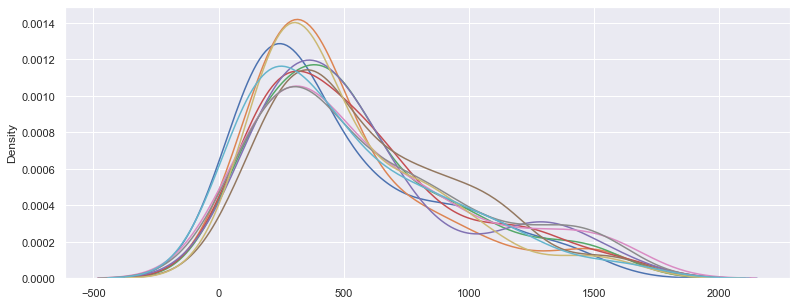

In [21]:
sns.set(rc={'figure.figsize':(13,5)})
[sns.distplot(s, hist=False) for s in normal_mean_mean_avg_degree];

In [22]:
np.mean([np.median(s) for s in anomalous_mean_mean_avg_degree])

383.5

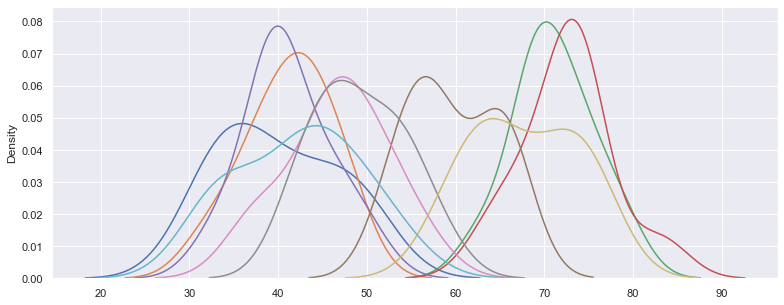

In [13]:
[sns.distplot(s, hist=False) for s in anomalous_mean_mean_avg_degree];